# 1.2 Initial Data Analysis
The National Institute of Diabetes and Digestive and Kidney
Diseases conducted a study on 768 adult female Pima Indians living near Phoenix. The
following variables were recorded:
* Pregnancies: number of times pregnant, 
* Glucose: plasma glucose concentration at 2 hours in an oral glucose tolerance test, 
* BloodPressure: diastolic blood pressure (mmHg), 
* SkinThickness: triceps skin fold thickness (mm), 
* Insulin: 2-hour serum insulin (mu U/ml), 
* BMI: body mass index (weight in kg/(height in m2)), 
* DiabetesPedigreeFunction: diabetes pedigree function, 
* Age: age (years) 
* Outcome: a test whether the patient showed signs of diabetes (coded zero if negative, one if positive).

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

##### Load the dataset `Pima Indians` : www.ics.uci.edu/˜mlearn/MLRepository.html.

In [4]:
pima=pd.read_csv('./Data/pima-indians-diabetes.csv')
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Check the NAs in the dataset

In [5]:
pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Construct numerical summary
The describe( ) function is a quick way to get the usual univariate summary
information. At this stage, we are looking for anything unusual or unexpected, perhaps
indicating a data-entry error. For this purpose, a close look at the minimum and
maximum values of each variable is worthwhile. Starting with pregnant, we see a maximum
value of 17. This is large, but not impossible. However, we then see that the next
five variables have minimum values of zero. No blood pressure is not good for the
health—something must be wrong.

In [6]:
pima.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Sort diastolic and show the first few values.

In [7]:
pima.BloodPressure.sort_values().head(5)

347    0
494    0
222    0
81     0
78     0
Name: BloodPressure, dtype: int64

In [8]:
(pima.BloodPressure==0).sum()

35

We see that the first 35 values are zero. The description that comes with the data says
nothing about it but it seems likely that the zero has been used as a missing value code. For
one reason or another, the researchers did not obtain the blood pressures of 35 patients.
In a real investigation, one would likely be able to question the researchers about what
really happened. Nevertheless, this does illustrate the kind of misunderstanding that can
easily occur. A careless statistician might overlook these presumed missing values and
complete an analysis assuming that these were real observed zeros. If the error was later discovered,
they might then blame the researchers for using zero as a missing value code (not a good choice
since it is a valid value for some of the variables) and not mentioning it in their data description.
Unfortunately such oversights are not uncommon, particularly with datasets of any size
or complexity. The statistician bears some share of responsibility for spotting these mistakes.
##### We set all zero values of the five variables to NA.

In [9]:
missing_rep={'Glucose':0,'BloodPressure':0,'SkinThickness':0,'Insulin':0,'BMI':0}
pima.replace(missing_rep, np.nan, inplace=True)
pima.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,763.00,733.00,541.00,394.00,757.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.54,12.38,10.48,118.78,6.92,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,76.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,190.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [10]:
pima.Outcome.dtype

dtype('int64')

In [11]:
pima.Outcome=pima.Outcome.astype('category')
pima.Outcome=pima.Outcome.cat.rename_categories(['Negative','Positive'])
pima.Outcome.describe()

count          768
unique           2
top       Negative
freq           500
Name: Outcome, dtype: object

In [12]:
pima.Outcome.value_counts()

Negative    500
Positive    268
Name: Outcome, dtype: int64

We now see that 500 cases were negative and 268 were positive.
Now that we have cleared up the missing values and coded the data appropriately, we are
ready to do some plots. 

In [14]:
pimad=pima.BloodPressure.dropna().sort_values()

/Users/dingxuanzhang/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


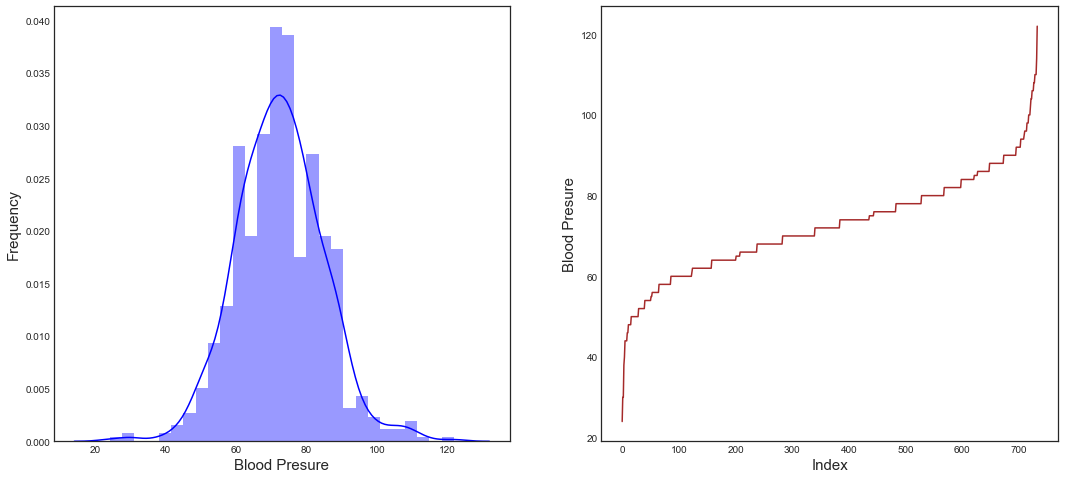

In [29]:
fig, (ax1, ax2)=plt.subplots(ncols=2,sharex=False, sharey=False)
fig.set_figheight(8)
fig.set_figwidth(18)

#First plot
sns.distplot(pimad,ax=ax1, color='blue')
ax1.set_xlabel('Blood Presure', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)

#Second plot
sns.lineplot(np.arange(len(pimad)), pimad, ax=ax2, color='brown')
ax2.set_ylabel('Blood Presure', fontsize=15)
ax2.set_xlabel('Index', fontsize=15)

plt.show()

Figure 1.1 The first panel shows a histogram of the diastolic blood pressures,
and a kernel density estimate of the
same, while the second shows an index plot of the sorted values.

We see a bell-shaped distribution for the diastolic
blood pressures centered around 70. Another alternative is to simply plot
the sorted data against its index:

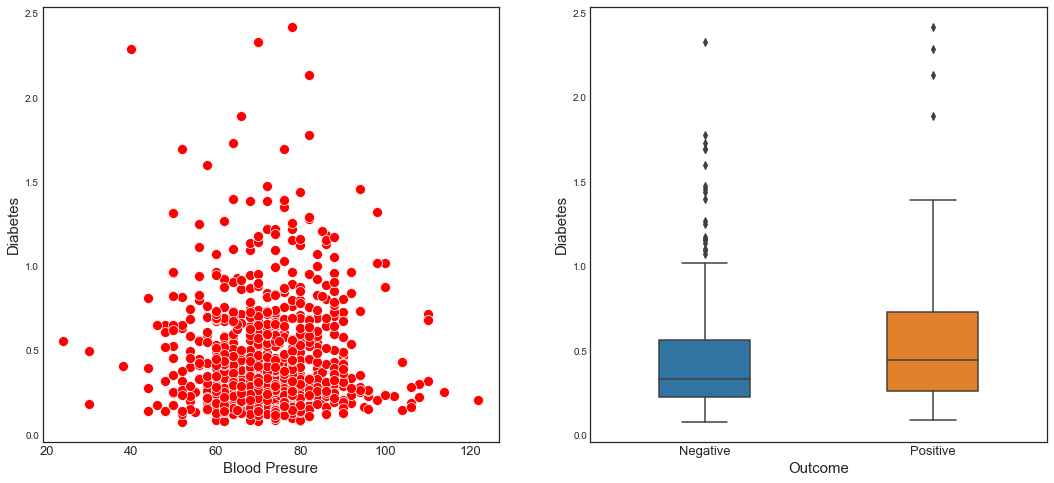

In [68]:
fig, (ax1, ax2)=plt.subplots(ncols=2, sharex=False, sharey=False)
fig.set_figheight(8)
fig.set_figwidth(18)

#First plot
sns.scatterplot(x=pima.BloodPressure, y=pima.DiabetesPedigreeFunction, markers='o', ax=ax1, color='red', s=100)
ax1.set_xlabel('Blood Presure', fontsize=15)
ax1.set_ylabel('Diabetes', fontsize=15)

#Second plot
sns.boxplot(x=pima.Outcome, y=pima.DiabetesPedigreeFunction, ax=ax2, width=0.4)
ax2.set_xlabel('Outcome', fontsize=15)
ax2.set_ylabel('Diabetes', fontsize=15)


for item in ax2.get_xticklabels():
    item.set_fontsize(13)
for item in ax1.get_xticklabels():
    item.set_fontsize(13)